# Linear Regression-Fish Market Dataset

In [58]:
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import json
import pickle

### 1.Problem Statement

### 2. Data Gathering

In [2]:
df=pd.read_csv('Fish_Market.csv')
df['Width'].shape

(159,)

In [3]:
df.columns

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Weight'],
      dtype='object')

### 3.Exploratary Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Weight   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.head().T

,0,1,2,3,4
Species,Bream,Bream,Bream,Bream,Bream
Length1,23.2,24.0,23.9,26.3,26.5
Length2,25.4,26.3,26.5,29.0,29.0
Length3,30.0,31.2,31.1,33.5,34.0
Height,11.52,12.48,12.3778,12.73,12.444
Width,4.02,4.3056,4.6961,4.4555,5.134
Weight,242.0,290.0,340.0,363.0,430.0


<AxesSubplot:xlabel='Length1'>

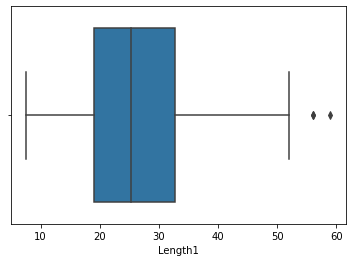

In [6]:
sns.boxplot(x=df['Length1'])

In [7]:
q1=np.quantile(df['Length1'],0.25)
q3=np.quantile(df['Length1'],0.75)

IQR=q3-q1
print("IQR is :",IQR)

lower_tail=q1-1.5*IQR
upper_tail=q3+1.5*IQR

print("lower tail :",lower_tail)
print('upper tail :',upper_tail)

IQR is : 13.650000000000002
lower tail : -1.4250000000000007
upper tail : 53.175000000000004


In [8]:
df.loc[(df['Length1']> upper_tail),'Length1']=upper_tail

<AxesSubplot:xlabel='Length1'>

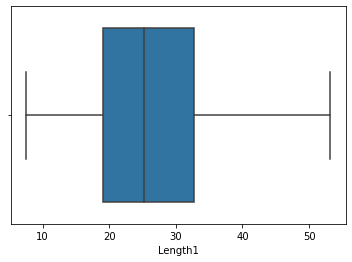

In [9]:
sns.boxplot(x=df['Length1'])

### 4.Feature Engineering

In [10]:
q1=np.quantile(df['Length1'],0.25)
q3=np.quantile(df['Length1'],0.75)

IQR=q3-q1
print("IQR is :",IQR)

lower_tail=q1-1.5*IQR
upper_tail=q3+1.5*IQR

print("lower tail :",lower_tail)
print('upper tail :',upper_tail)

IQR is : 13.650000000000002
lower tail : -1.4250000000000007
upper tail : 53.175000000000004


In [11]:
df.loc[(df['Length1']> upper_tail),'Length1']=upper_tail

<AxesSubplot:xlabel='Length1'>

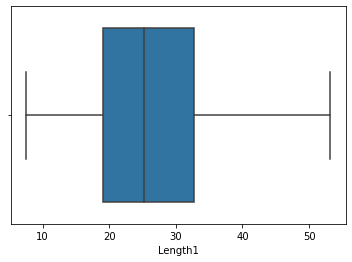

In [12]:
sns.boxplot(x=df['Length1'])

#### 1.Species

In [13]:
df['Species']

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [14]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [15]:
df=pd.get_dummies(df,columns=['Species'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length1            159 non-null    float64
 1   Length2            159 non-null    float64
 2   Length3            159 non-null    float64
 3   Height             159 non-null    float64
 4   Width              159 non-null    float64
 5   Weight             159 non-null    float64
 6   Species_Bream      159 non-null    uint8  
 7   Species_Parkki     159 non-null    uint8  
 8   Species_Perch      159 non-null    uint8  
 9   Species_Pike       159 non-null    uint8  
 10  Species_Roach      159 non-null    uint8  
 11  Species_Smelt      159 non-null    uint8  
 12  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


#### 2.Length1

In [17]:
df['Length1'].value_counts()

19.000    6
20.000    5
20.500    4
22.000    4
53.175    3
         ..
33.700    1
25.600    1
24.100    1
22.100    1
13.200    1
Name: Length1, Length: 115, dtype: int64

In [18]:
df['Length1'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Name: Length1, Length: 159, dtype: bool

<AxesSubplot:xlabel='Length1'>

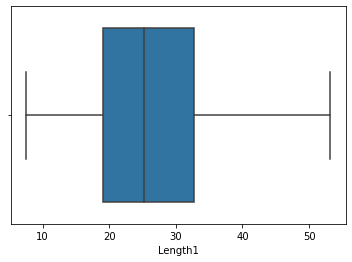

In [19]:
sns.boxplot(x = df['Length1'])   #check outlier in data

#### 3.Length2

In [20]:
df['Length2'].value_counts()

22.0    7
35.0    6
22.5    5
40.0    5
21.0    4
       ..
19.6    1
21.3    1
22.7    1
24.6    1
14.3    1
Name: Length2, Length: 93, dtype: int64

<AxesSubplot:xlabel='Length2'>

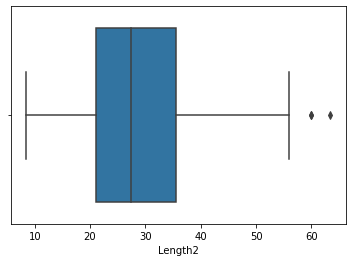

In [21]:
sns.boxplot(x = df['Length2']) 

In [22]:
q1=np.quantile(df['Length2'],0.25)
q3=np.quantile(df['Length2'],0.75)

IQR=q3-q1
print("IQR is :",IQR)

lower_tail=q1-1.5*IQR
upper_tail=q3+1.5*IQR

print("lower tail :",lower_tail)
print('upper tail :',upper_tail)

df.loc[(df['Length2']> upper_tail),'Length2']=upper_tail

IQR is : 14.5
lower tail : -0.75
upper tail : 57.25


<AxesSubplot:xlabel='Length2'>

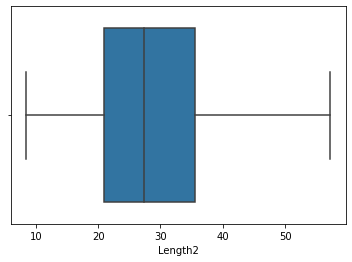

In [23]:
sns.boxplot(x = df['Length2']) 

#### 4.Length3

In [24]:
df['Length3'].value_counts()

23.5    5
25.0    3
22.5    3
34.0    3
45.5    3
       ..
27.9    1
26.8    1
26.7    1
27.2    1
15.2    1
Name: Length3, Length: 124, dtype: int64

<AxesSubplot:xlabel='Length3'>

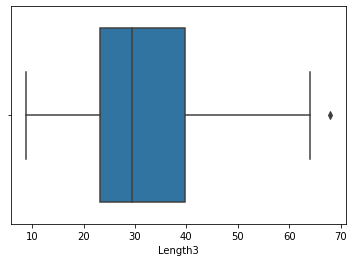

In [25]:
sns.boxplot(x = df['Length3']) 

In [26]:
q1=np.quantile(df['Length3'],0.25)
q3=np.quantile(df['Length3'],0.75)

IQR=q3-q1
print("IQR is :",IQR)

lower_tail=q1-1.5*IQR
upper_tail=q3+1.5*IQR

print("lower tail :",lower_tail)
print('upper tail :',upper_tail)

df.loc[(df['Length3']> upper_tail),'Length3']=upper_tail

IQR is : 16.500000000000007
lower tail : -1.600000000000012
upper tail : 64.40000000000002


<AxesSubplot:xlabel='Length3'>

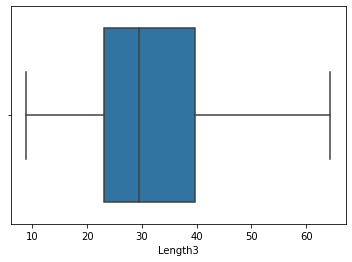

In [27]:
sns.boxplot(x = df['Length3']) 

#### 5.Height

In [28]:
df['Height'].value_counts()

11.1366    2
5.6925     2
2.2139     2
6.1100     2
9.6000     2
          ..
8.8768     1
8.5680     1
9.4850     1
8.3804     1
2.9322     1
Name: Height, Length: 154, dtype: int64

<AxesSubplot:xlabel='Height'>

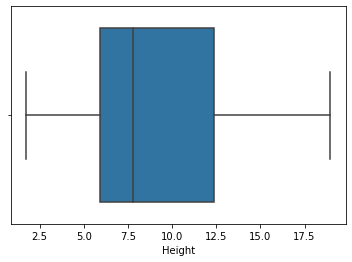

In [29]:
sns.boxplot(x = df['Height']) 

<AxesSubplot:xlabel='Height', ylabel='Density'>

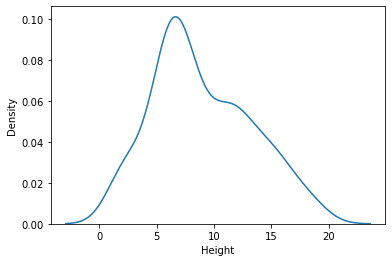

In [30]:
sns.kdeplot(df['Height'])

In [31]:
index=np.where(np.abs(zscore(df['Height']))>3)
index

(array([], dtype=int64),)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length1            159 non-null    float64
 1   Length2            159 non-null    float64
 2   Length3            159 non-null    float64
 3   Height             159 non-null    float64
 4   Width              159 non-null    float64
 5   Weight             159 non-null    float64
 6   Species_Bream      159 non-null    uint8  
 7   Species_Parkki     159 non-null    uint8  
 8   Species_Perch      159 non-null    uint8  
 9   Species_Pike       159 non-null    uint8  
 10  Species_Roach      159 non-null    uint8  
 11  Species_Smelt      159 non-null    uint8  
 12  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


#### 6. Width

In [33]:
df['Width'].value_counts()
df['Width'].unique().shape


(152,)

In [34]:
df['Width'].isna().sum()

0

<AxesSubplot:xlabel='Width'>

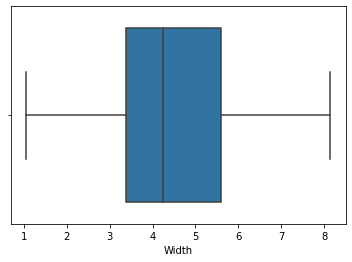

In [35]:
sns.boxplot(x=df['Width'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length1            159 non-null    float64
 1   Length2            159 non-null    float64
 2   Length3            159 non-null    float64
 3   Height             159 non-null    float64
 4   Width              159 non-null    float64
 5   Weight             159 non-null    float64
 6   Species_Bream      159 non-null    uint8  
 7   Species_Parkki     159 non-null    uint8  
 8   Species_Perch      159 non-null    uint8  
 9   Species_Pike       159 non-null    uint8  
 10  Species_Roach      159 non-null    uint8  
 11  Species_Smelt      159 non-null    uint8  
 12  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


#### 8 Weight

In [37]:
df['Weight'].value_counts()

300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: Weight, Length: 101, dtype: int64

### 5.Feature Selection

#### 5.1 linearity

<Figure size 720x720 with 0 Axes>

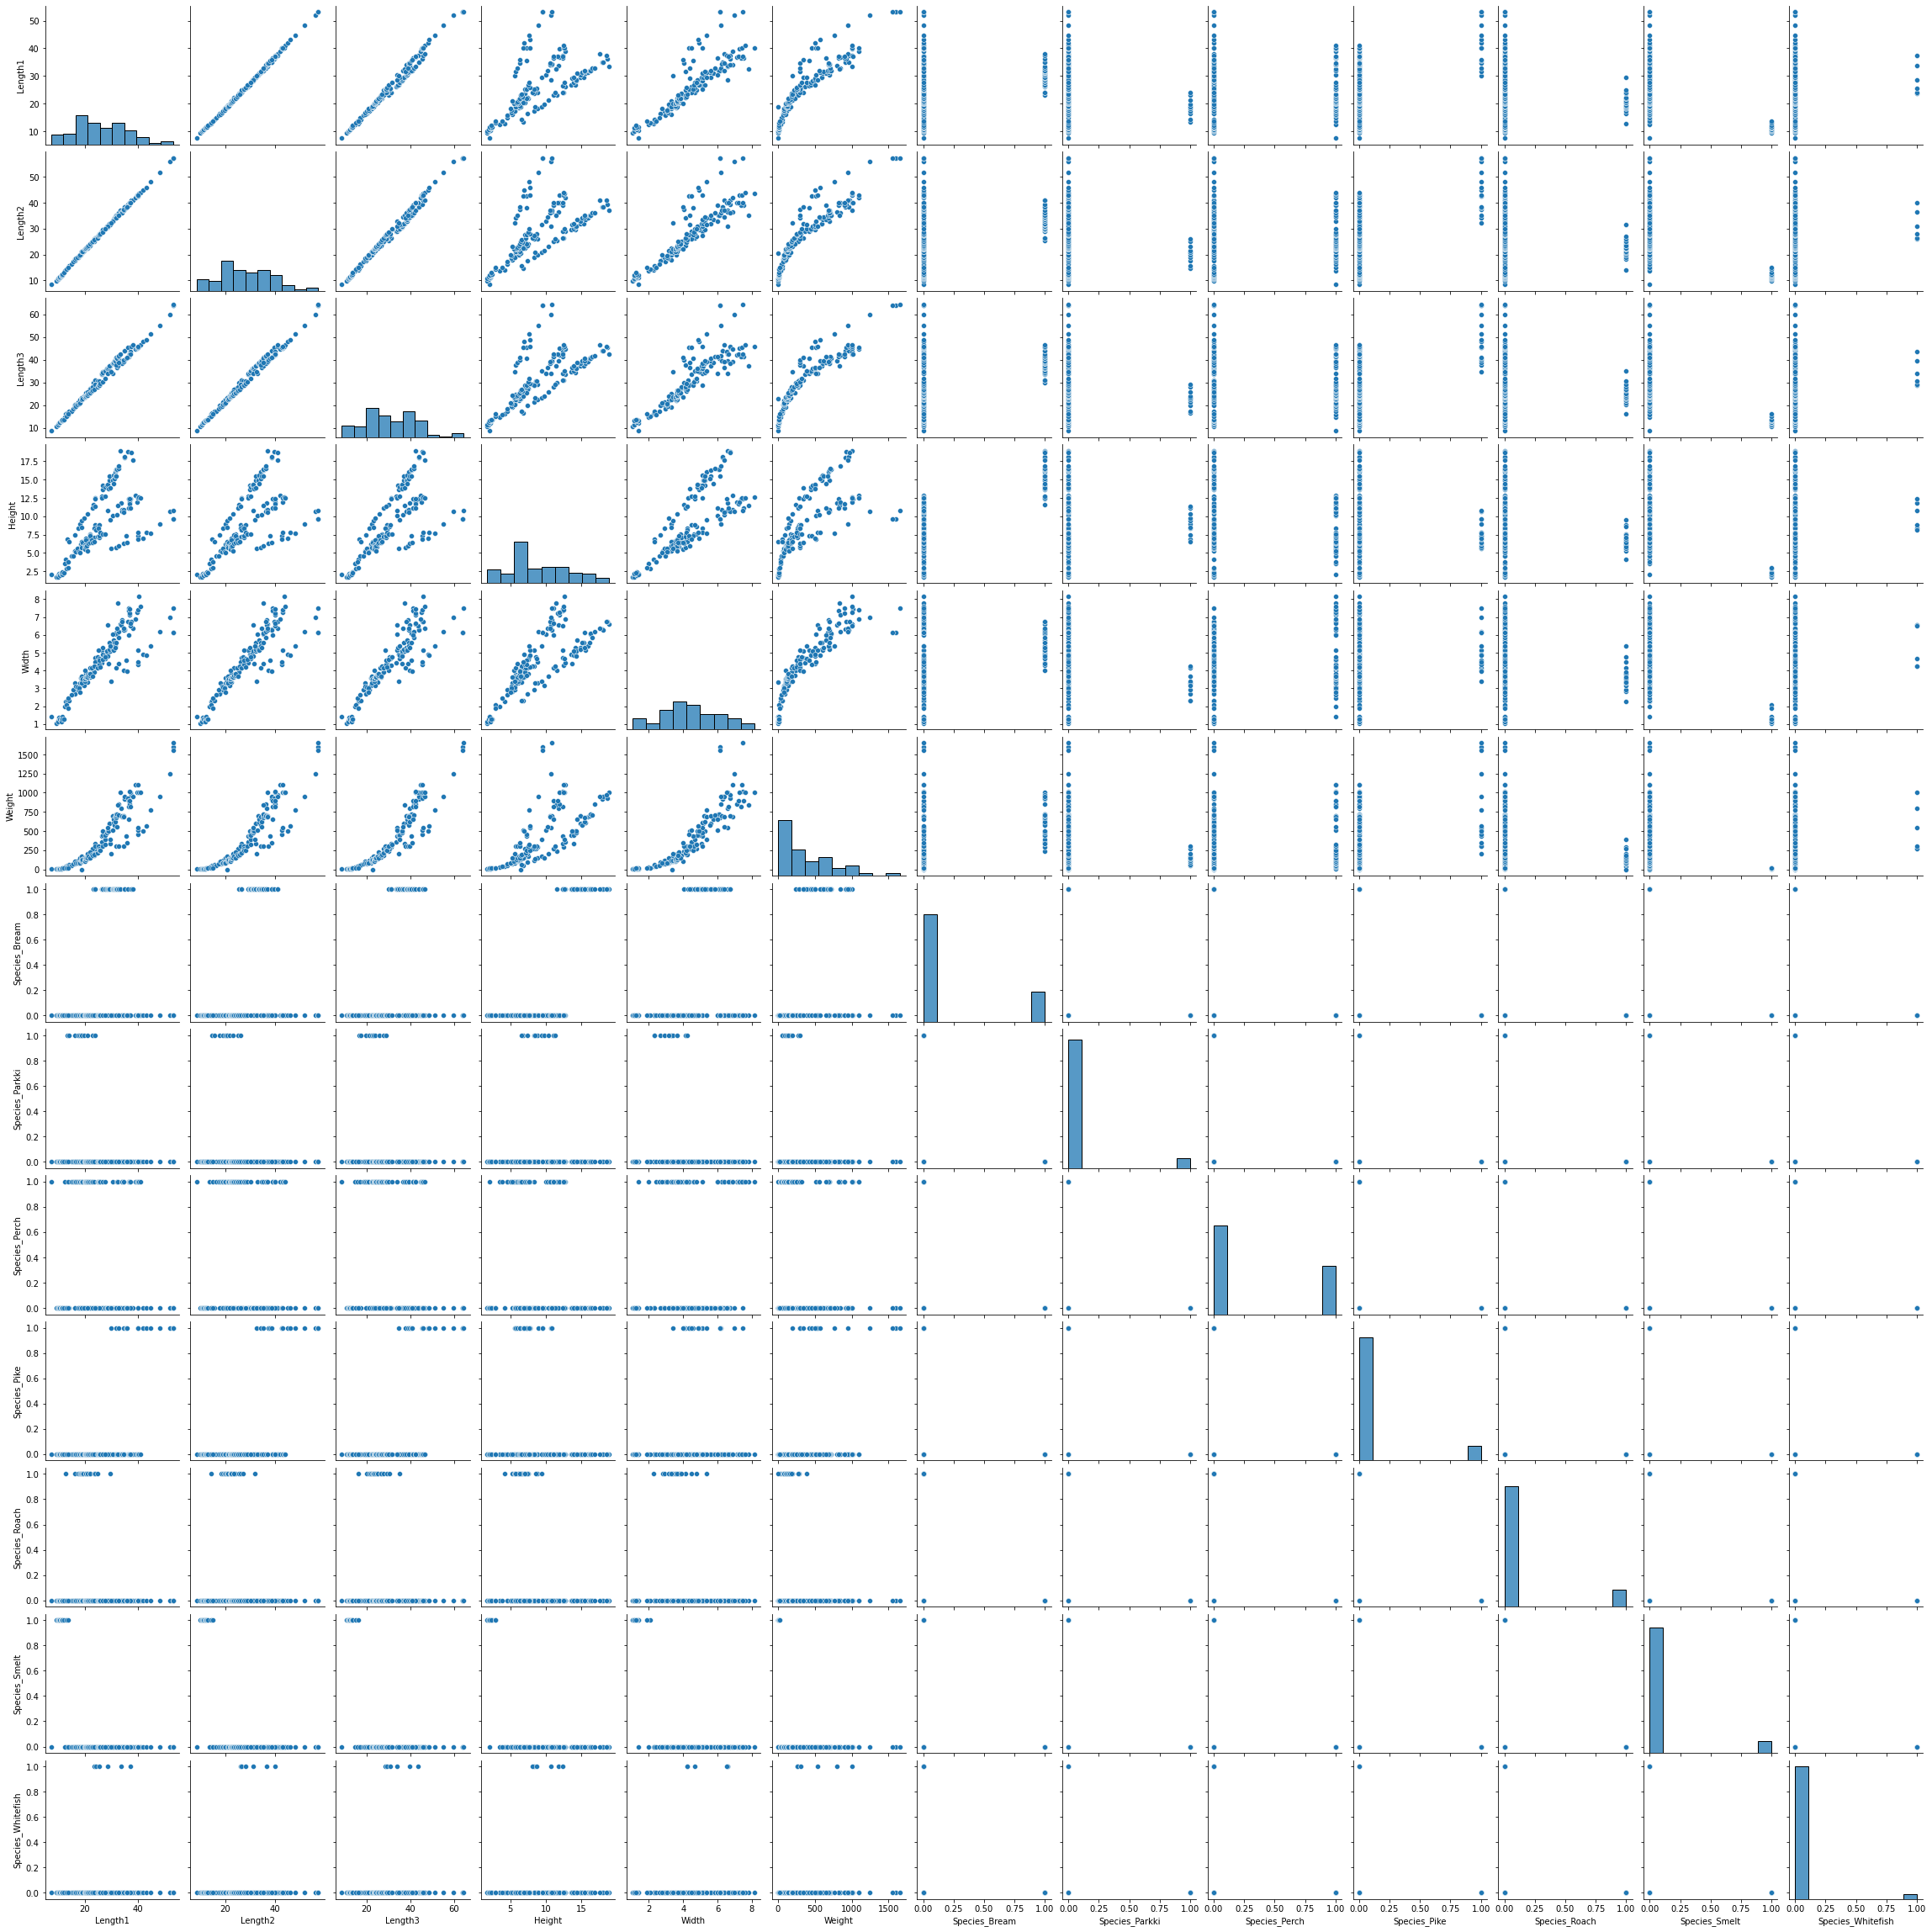

In [38]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [39]:
df.corr()

,Length1,Length2,Length3,Height,Width,Weight,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Length1,1.000000,0.999503,0.991943,0.636902,0.875426,0.910549,0.225046,-0.208215,-0.033216,0.554451,-0.215107,-0.475345,0.053307
Length2,0.999503,1.000000,0.993990,0.651566,0.881426,0.913697,0.241922,-0.208295,-0.031673,0.543944,-0.219888,-0.487491,0.056272
Length3,0.991943,0.993990,1.000000,0.706758,0.880175,0.921648,0.330167,-0.199367,-0.104657,0.520326,-0.205549,-0.490700,0.053570
Height,0.636902,0.651566,0.706758,1.000000,0.792881,0.724345,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.875426,0.881426,0.880175,0.792881,1.000000,0.886507,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Weight,0.910549,0.913697,0.921648,0.724345,0.886507,1.000000,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Species_Bream,0.225046,0.241922,0.330167,0.772443,0.319347,0.326795,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Species_Parkki,-0.208215,-0.208295,-0.199367,-0.000547,-0.194147,-0.186034,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033216,-0.031673,-0.104657,-0.191405,0.144021,-0.033240,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.554451,0.543944,0.520326,-0.101810,0.137722,0.310641,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


<AxesSubplot:>

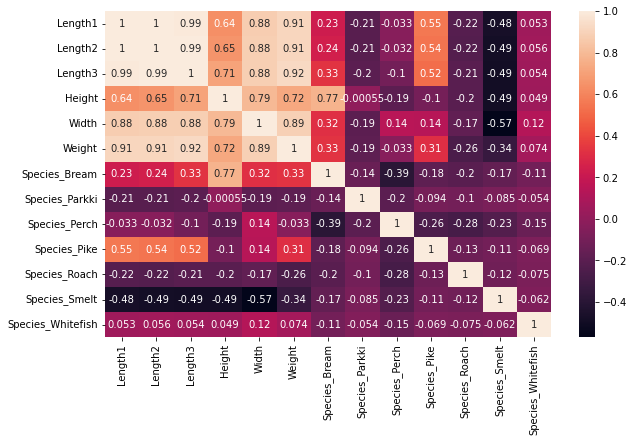

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.corr()['Weight']

Length1              0.910549
Length2              0.913697
Length3              0.921648
Height               0.724345
Width                0.886507
Weight               1.000000
Species_Bream        0.326795
Species_Parkki      -0.186034
Species_Perch       -0.033240
Species_Pike         0.310641
Species_Roach       -0.261784
Species_Smelt       -0.337109
Species_Whitefish    0.073625
Name: Weight, dtype: float64

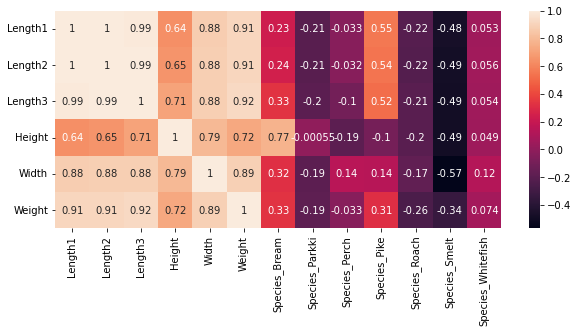

In [42]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr().head(6),annot=True)
plt.savefig('corr.png')

#### 5.2 No. Multicolinearity

In [43]:
x=df.drop('Weight',axis=1)
x

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [44]:
vif_list=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index= x.columns).sort_values()
s1

Species_Smelt           1.826546
Species_Whitefish       2.321958
Species_Roach           3.424122
Species_Parkki          4.412060
Species_Perch          11.106765
Species_Pike           16.858018
Width                  29.231653
Species_Bream          40.404691
Height                 60.195639
Length3               717.827004
Length1              2295.436263
Length2              3722.180350
dtype: float64

### 6 Model Training

In [45]:
x = df.drop('Weight',axis = 1)
y = df['Weight']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=12)

In [46]:
x_test.shape

(32, 12)

In [47]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

### 7 Model Evalution

In [48]:
# testing data evalulation

y_test_pred=linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("MAE :",mae)

r_squared = r2_score(y_test, y_test_pred)
print('R- Squared value :',r_squared)

MSE : 8870.702882257745
RMSE : 94.18440891282243
MAE : 71.49914736782077
R- Squared value : 0.9500906386387663


In [49]:
# Training data evalulation

y_train_pred=linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_train_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print("MAE :",mae)

r_squared = r2_score(y_train, y_train_pred)
print('R- Squared value :',r_squared)

MSE : 7226.114723216224
RMSE : 85.00655694248664
MAE : 64.29378120117377
R- Squared value : 0.9369695783961919


### Normality of residual

In [50]:
residual=y_train-y_train_pred
residual

24     -17.020330
71     -83.393830
148     26.441287
132     14.026648
153      0.570851
          ...    
3      -20.473684
130   -137.789440
134    -65.789516
155     -8.553675
75     115.800974
Name: Weight, Length: 127, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

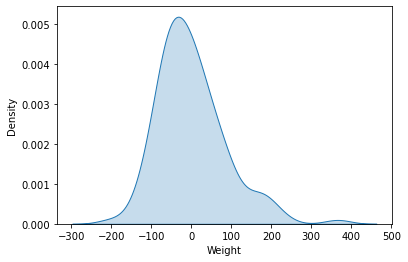

In [51]:
sns.kdeplot(residual,fill=True)

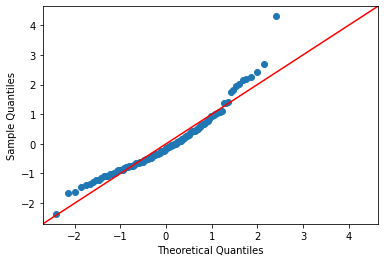

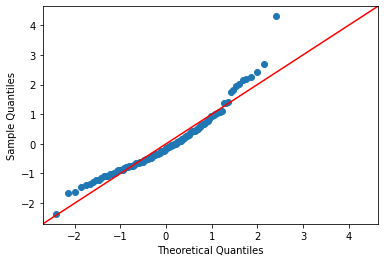

In [52]:
sm.qqplot(residual,line='45',fit=True)

<AxesSubplot:xlabel='Weight', ylabel='Weight'>

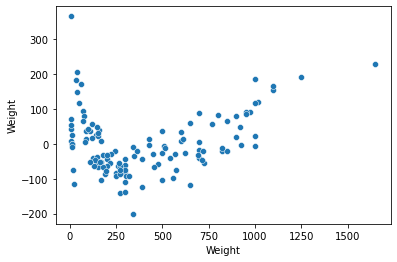

In [53]:
sns.scatterplot(x=y_train,y=residual)

In [54]:
column_names=x.columns
column_names

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Bream',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [60]:
with open(r'Artifacts\linear_model.pkl','wb')as f:
    pickle.dump(linear_reg,f)

In [55]:
project_data={'Column Names':column_names.to_list()}

In [59]:
with open(r'Artifacts\project_data.json','w')as f:
     json.dump(project_data, f)

In [61]:
project_data['Column Names'].index

['Length1',
 'Length2',
 'Length3',
 'Height',
 'Width',
 'Species_Bream',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish']